<a href="https://colab.research.google.com/github/PatrycjaStu/DPOCN/blob/master/Diff_List_5_234875_Patrycja_Studzienna.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Assignment 5**

In [0]:
from scipy.integrate import odeint
import numpy as np
import networkx as nx
import random as rn
import matplotlib.pyplot as plt
import imageio
import os

## Task 1

In [0]:
def plague(y, t, b, beta, k):
  '''Plague model with y as initial condition and parameters b, beta, k in time t'''
  S, I = y
  dydt = [b*S - beta*I*S, beta*I*S - k*I]
  return dydt

In [0]:
#initial conditions
S0= 1.0
I0 = [.1, .5, 1.3]
t = np.linspace(0, 20, 1001)
#parameters
beta = 3
k = 3
b = 3
#solving plague model
sol1 = odeint(plague, [S0,I0[0]], t, args=(b, beta, k))
sol2 = odeint(plague, [S0,I0[1]], t, args=(b, beta, k))
sol3 = odeint(plague, [S0,I0[2]], t, args=(b, beta, k))
soll = [sol1,sol2, sol3]

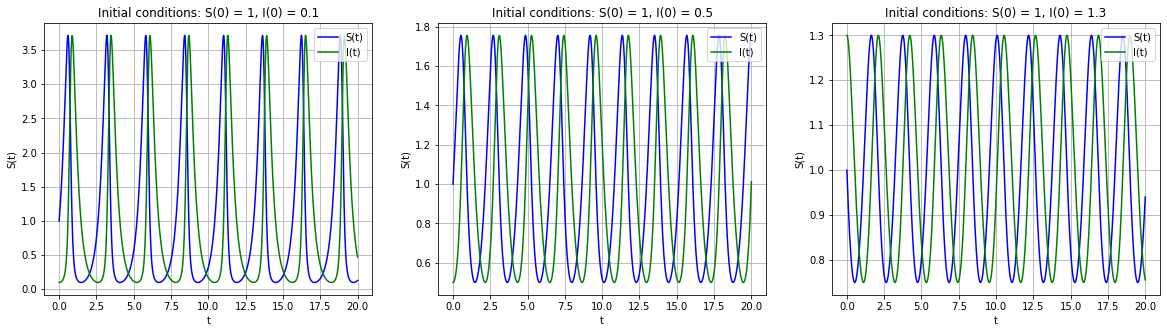

In [4]:
plt.figure(figsize=(20,5))
for i in range(3):
  sol = soll[i]
  plt.subplot(1,3,i+1)
  plt.plot(t, sol[:, 0], 'b', label='S(t)')
  plt.plot(t, sol[:, 1], 'g', label='I(t)')
  plt.legend(loc='upper right')
  plt.xlabel('t')
  plt.ylabel('S(t)')
  plt.title('Initial conditions: S(0) = 1, I(0) = '+str(I0[i]))
  plt.grid()

Text(0.5, 0, 'beta=3, k=3, b=3')

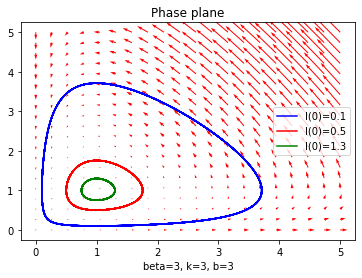

In [5]:
#phase plane 
y1 = np.linspace(0.0, 5.0, 20)
y2 = np.linspace(0.0, 5.0, 20)

Y1, Y2 = np.meshgrid(y1, y2)

u, v = np.zeros(Y1.shape), np.zeros(Y2.shape)

NI, NJ = Y1.shape

for i in range(NI):
    for j in range(NJ):
        x = Y1[i, j]
        y = Y2[i, j]
        yprime = plague([x,y], t, b, beta, k)
        u[i,j] = yprime[0]
        v[i,j] = yprime[1]

Q = plt.quiver(Y1, Y2, u, v, color='r')

plt.plot(sol1[:,0], sol1[:,1], 'b', label='I(0)=0.1') # path
plt.plot(sol2[:,0], sol2[:,1], 'r', label='I(0)=0.5') # path
plt.plot(sol3[:,0], sol3[:,1], 'g', label='I(0)=1.3') # path
plt.legend()
plt.title("Phase plane")
plt.xlabel('beta='+str(beta)+', k='+str(k)+', b='+str(b))

Steady state is for:
$$b S(t) - \beta I(t) S(t) = \beta I(t) S(t) - k I(t) = 0.$$
$$I(t) = \frac{b}{\beta}$$
$$S(t) = \frac{k}{\beta}.$$
For $b = k = \beta = 3$:
$$ I(t) = S(t) = 1.$$

The steady state is central type.

##Task 2

In [0]:
def sirModel(y, t, r, beta):
  '''SIR model with parameter r, beta, on time t and initial conditions y'''
  S, I, R = y
  dydt = [- beta*I*S, beta*I*S - r*I, r*I]
  return dydt

Text(0.5, 0, 'beta=0.2, r=170')

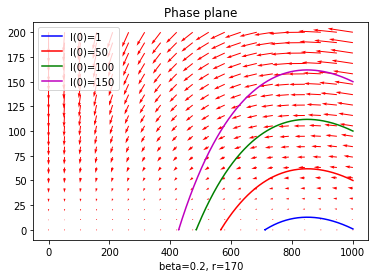

In [7]:
#parameters
beta = .2
r = 170
#initial condition
S0= 1000.0 
I0 = [1.0,50.0,100.0,150.0]
R0 = 0.0
t = np.linspace(0, 10, 100001)
#solving SIR
sol1 = odeint(sirModel, [S0, I0[0], R0], t, args=(r, beta))
sol2 = odeint(sirModel, [S0, I0[1], R0], t, args=(r, beta))
sol3 = odeint(sirModel, [S0, I0[2], R0], t, args=(r, beta))
sol4 = odeint(sirModel, [S0, I0[3], R0], t, args=(r, beta))

#phase plane
y1 = np.linspace(0.0, 1000.0, 20)
y2 = np.linspace(0.0, 200.0, 20)

Y1, Y2 = np.meshgrid(y1, y2)

u, v = np.zeros(Y1.shape), np.zeros(Y2.shape)

NI, NJ = Y1.shape

for i in range(NI):
    for j in range(NJ):
        x = Y1[i, j]
        y = Y2[i, j]
        yprime = sirModel([x,y,0], t, r, beta)
        u[i,j] = yprime[0]
        v[i,j] = yprime[1]

Q = plt.quiver(Y1, Y2, u, v, color='r')

plt.plot(sol1[:,0], sol1[:,1], 'b', label = 'I(0)=1') # path
plt.plot(sol2[:,0], sol2[:,1], 'r', label = 'I(0)=50')
plt.plot(sol3[:,0], sol3[:,1], 'g', label = 'I(0)=100')
plt.plot(sol4[:,0], sol4[:,1], 'm', label = 'I(0)=150')
plt.legend()
plt.title("Phase plane")
plt.xlabel('beta='+str(beta)+', r='+str(r))

In [9]:
plt.figure(figsize=(10,10))
t = np.linspace(0, .3, 101)
r = 170
y0 = [1000.0, 0.1, 0.0]
beta = [.09, .18, .2, .22, .25, .35]
images =[]
path = os.getcwd()
#folder for images
if 'R0' not in os.listdir(path):
    #create folder for plots if it not exist
    os.mkdir(path+"/R0/")
for i in range(len(beta)):
  # create plots for different beta => different R0
  plt.figure()
  sol1 = odeint(sirModel, y0, t, args=(r, beta[i]))
  plt.plot(t, sol1[:, 0], 'b', label='S(t)')
  plt.plot(t, sol1[:, 1], 'g', label='I(t)')
  plt.plot(t, sol1[:, 2], 'r', label='R(t)')
  plt.legend(loc='upper right')
  plt.xlabel('t')
  plt.grid()
  plt.title('R0='+str(beta[i]*y0[0]/r))
  plt.savefig(os.path.join(path+"/R0/","graph{i}.png".format(i=i)))
  #add to list of images
  images.append(imageio.imread(path+"/R0/graph{i}.png".format(i=i)))
  plt.close()
#create gif
imageio.mimsave('R0.gif', images,  duration = 0.8)

<Figure size 720x720 with 0 Axes>

Text(0, 0.5, 'Total number of infections')

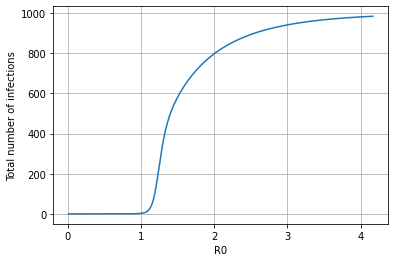

In [10]:
beta = np.linspace(0.001,0.5,1000) 
r = np.linspace(95,120,1000)
y0 = [1000.0, 0.1, 0.0]
N=1000
R0 = beta*N/r
total = []
for i in range(1000):
  #total number of infections is equal to number of recovered people
  total.append(odeint(sirModel, y0, t, args=(r[i], beta[i]))[-1, 2])
plt.plot(R0, total)
plt.grid()
plt.xlabel('R0')
plt.ylabel('Total number of infections')

##Task 3

In [0]:
#graphs
N = 10
G_lattice=nx.grid_2d_graph(N,N)
labels = dict( ((i,j), i + (N-1-j) * N ) for i, j in G_lattice.nodes() )
nx.relabel_nodes(G_lattice,labels,False)

nodes = 100
G_ba = nx.barabasi_albert_graph(nodes,2) 
G_ws = nx.watts_strogatz_graph(nodes,6,.09)
G_rn = nx.gnp_random_graph(nodes,.03)

In [0]:
def infection(infected, recovered, p, graph):
  '''Function create list of infected nodes in step. Returns list of nodes infected in this step and list of 
  recovered nodes.

  infected -- list of infected nodes in previous step
  recoverd -- list of recovered nodes in graph
  p -- probability that next node will be infected
  graph -- graph to simulate infections
  '''
  #nodes infected in this time step
  new_infected=[]
  #for nodes infected in previous step
  for node in infected:
      # choosing neighbor of node that is not infected and recovered
      for neighbor in list(graph.neighbors(node)):
        if neighbor not in infected:
          #recovered node can't be infected
          if neighbor not in recovered:
            if p>rn.random():
              #infect with probability p
              new_infected.append(neighbor)
  #nodes infected in previous step are recovered now
  recovered.extend(infected)
  return new_infected, recovered

In [0]:
def SIR(start_node, p, graph):
  '''Simulation of SIR model on graph.

  start_node -- first infected node
  p -- probability of infection
  graph -- object type graph
  '''
  #first node is infected
  infected = [start_node]
  recovered=[]
  #number of nodes in graph
  nodes = len(graph.nodes())
  #proportion of infected nodes to all nodes in graph
  frac =[1/nodes]
  #time counter
  time = 0
  #stop when there is no infected node
  while infected!=[]:
    #one time step in SIR model
    new_infected, recovered = infection(infected, recovered, p, graph)
    #infected nodes after this step
    infected = list(dict.fromkeys(new_infected))
    #proportion of infected nodes to all nodes in graph in this time step
    frac.append(len(infected)/nodes)
    time += 1
  #return: proportion of infected nodes, proportion of all infections in graph, time to stop infection, time to maximum of infection 
  return frac, len(recovered)/nodes, time, frac.index(max(frac)) 

In [0]:
def frac_of_infected_nodes(p, graph, start_node=7, MC=100):
  '''Monte carlo simulation of fraction of infected nodes in the network at each time point'''
  #first step 
  P = SIR(start_node, p, graph)[0]
  #MC-1 steps
  for i in range(MC-1):
    sir = SIR(start_node, p, graph)[0]
    #add the fraction of infected nodes at time t
    for j in range(len(sir)):
      if j < len(P):
        P[j] = P[j] + sir[j]
      else:
        P.append(sir[j])
  # mean of fraction of infected nodes at time t
  return np.array(P)/MC

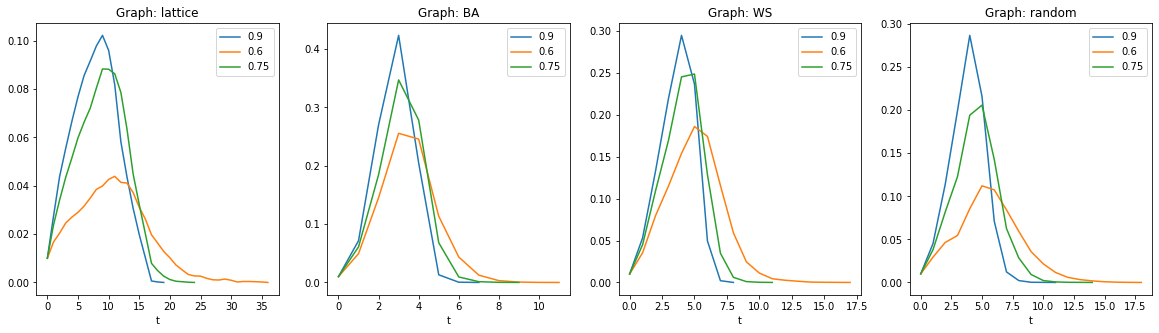

In [15]:
p = [.9, .6, .75]
graphs = [G_lattice,G_ba, G_ws, G_rn]
labels = ['0.9', '0.6', '0.75']
gg = ['lattice', 'BA', "WS", 'random']
plt.figure(figsize=(20,5))
#plot for differen p
for j in range(len(graphs)):
  plt.subplot(1,4,j+1)
  plt.title('Graph: '+str(gg[j]))
  for i in p:
    plt.plot(frac_of_infected_nodes(i,graphs[j]),label=labels[p.index(i)])
    plt.legend()
    plt.xlabel('t')

The greater the spread of infection is the greater is the fraction of infected nodes in graph. Also time of infection lasting is longer. The figure is similar as in ODE model.

In [0]:
def MC(p, graph, start_node=7, MC=100):
  ''' Monte carlo simulation of mean of measures from sirModel function'''
  total =[]
  clear_infection =[] 
  large =[]
  for i in range(MC):
    total_inf, clear, time_to_large = SIR(start_node, p, graph)[1:]
    total.append(total_inf)
    clear_infection.append(clear)
    large.append(time_to_large)
  return np.mean(total), np.mean(clear_infection), np.mean(large)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses th

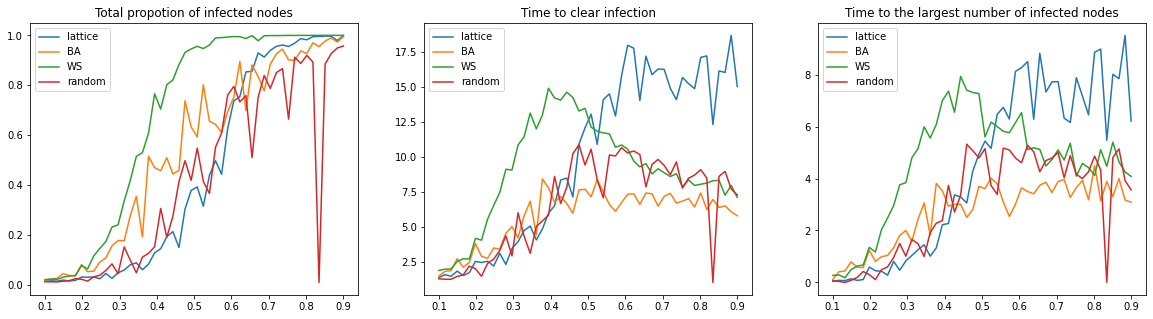

In [23]:
p = np.linspace(0.1,0.9,50)

graphs = [G_lattice,G_ba, G_ws, G_rn]
labels = ['lattice', 'BA', 'WS', 'random']
plt.figure(figsize=(20,5))
for j in graphs:
  frac = [] 
  clear_infection = [] 
  infection_max = []
  for i in range(len(p)):
    total_inf, clear, large = MC(p[i],j,rn.choice(range(nodes)))
    frac.append(total_inf)
    clear_infection.append(clear)
    infection_max.append(large)
  plt.subplot(131)
  plt.plot(p,frac,label=labels[graphs.index(j)])
  plt.legend()
  plt.title('Total propotion of infected nodes')
  plt.subplot(132)
  plt.plot(p,clear_infection,label=labels[graphs.index(j)])
  plt.legend()
  plt.title('Time to clear infection')
  plt.subplot(133)
  plt.plot(p,infection_max,label=labels[graphs.index(j)])
  plt.legend()
  plt.title('Time to the largest number of infected nodes')
  


Total proportion of infected people show that in for these parameters of networks WS graph has the most links between the nodes so infection spread fast even when probability is small. For other graphs it is more simmilar. The random graph is the most unstable.

WS graph has maximum of time to clear infection for quite small probability because of fast spreading of infection. Also, the longest time to the largest number of infected nodes is small (for probability about 0.4).

For other types of graphs these times are growing when p is growing. For p greater than 0.5 BA model has the longest times. It shows that infection on this graph last longer than on the others.

In [0]:
def GraphAnimation(G,p,name='graph_gif'):
  '''Function generate a gif of a SIR model on the graph.

  Keyword arguments:
  G -- generated graph that the SIR model will be simulated on
  p -- probability of infection
  name -- name of gif file
  '''
  path = os.getcwd()  #check path
  if 'graph' not in os.listdir(path):
    #create folder for plots if it not exist
    os.mkdir(path+"/graph/")
  #list of images
  images = []
  f = plt.figure()
  plt.title('SIR model on graph')
  #draw edges
  pos=nx.circular_layout(G)
  nx.draw_networkx_edges(G,pos)
  recovered =[]
  infected = [rn.choice(list(G.nodes))]
  while infected != []:
    new_infected, recovered = infection(infected, recovered, p, G)
    infected = list(dict.fromkeys(new_infected))
    #draw nodes
    nx.draw_networkx_nodes(G,pos,node_color='b')   
    #draw infected nodes on red    
    nx.draw_networkx_nodes(G,pos,nodelist=infected,node_color='r') 
    #draw recovered nodes on red    
    nx.draw_networkx_nodes(G,pos,nodelist=recovered,node_color='g')
    #save plot
    f.savefig(os.path.join(path+"/graph/","graph{i}.png".format(i=i)))
    #add to list of images
    images.append(imageio.imread(path+"/graph/graph{i}.png".format(i=i)))
  plt.close()
  #create gif
  imageio.mimsave(name+'.gif', images,  duration = 0.8)

In [0]:
g_ba = nx.barabasi_albert_graph(30,2) 
g_ws = nx.watts_strogatz_graph(30,6,.09)
g_rn = nx.gnp_random_graph(30,.3)
g_lattice=nx.grid_graph([5,6])
p=.3
names = ['BA', 'WS', 'random', 'lattice']
graphs = [g_ba, g_ws, g_rn, g_lattice]
for i in range(len(graphs)):
  GraphAnimation(graphs[i],p,name='graph_'+names[i])